# Quasi-Vertical Profiles

---

### ARCO Data Access

Canadian data was converted into Analysis-Ready Cloud-Optimized and can be accessed as follows

In [1]:
import xarray as xr
import icechunk

Configure S3 storage for [icechunk](https://icechunk.io/en/latest/). In this case we will analyze Calgary Hail Storm event. However, you can change it to Ontario Derecho by uncommenting the other prefix lines

In [2]:
storage = icechunk.s3_storage(
    bucket='pythia',
    prefix='radar/ams2025/CASSM.zarr', # Calgary Hail Storm
    # prefix='radar/ams2025/CASET.zarr', # CASET Ontario Derecho
    # prefix='radar/ams2025/CASKR.zarr', # CASKR Ontario Derecho

    endpoint_url='https://js2.jetstream-cloud.org:8001',
    anonymous=True,
    region='us-east-1',
    force_path_style=True
)

Creating S3 bucket connection and immutable session

In [3]:
repo = icechunk.Repository.open(storage=storage)
session = repo.readonly_session("main")

Opening the Radar datatree using `xarray`

In [4]:
dtree = xr.open_datatree(
    session.store, 
    engine="zarr",
    consolidated=False,
    chunks={}
)

In [5]:
dtree

<xarray.DataTree>
Group: /
├── Group: /georeferencing_correction
│       Dimensions:    (vcp_time: 56)
│       Coordinates:
│           altitude   float64 8B ...
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│         * vcp_time   (vcp_time) datetime64[ns] 448B 2024-08-05T23:54:03 ... 2024-08...
├── Group: /radar_parameters
│       Dimensions:    (vcp_time: 56)
│       Coordinates:
│           altitude   float64 8B ...
│           latitude   float64 8B ...
│           longitude  float64 8B ...
│         * vcp_time   (vcp_time) datetime64[ns] 448B 2024-08-05T23:54:03 ... 2024-08...
├── Group: /sweep_0
│       Dimensions:            (vcp_time: 56, azimuth: 360, range: 245)
│       Coordinates:
│         * azimuth            (azimuth) float64 3kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│           latitude           float64 8B ...
│           longitude          float64 8B ...
│         * range              (range) float32 980B 250.0 750.0 ... 1.218e+05 1.222e+05
│           altitude           float64 8B ...
│           elevation          (azimuth) float64 3kB dask.array<chunksize=(360,), meta=np.ndarray>
│         * vcp_time           (vcp_time) datetime64[ns] 448B 2024-08-05T23:54:03 ......
│           y                  (azimuth, range) float64 706kB dask.array<chunksize=(180, 123), meta=np.ndarray>
│           crs_wkt            int64 8B ...
│           time               (azimuth) datetime64[ns] 3kB dask.array<chunksize=(360,), meta=np.ndarray>
│           z                  (azimuth, range) float64 706kB dask.array<chunksize=(180, 123), meta=np.ndarray>
│           x                  (azimuth, range) float64 706kB dask.array<chunksize=(180, 123), meta=np.ndarray>
│       Data variables:
│           DBZH               (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           KDP                (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           TH                 (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           VRADH              (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           WRADH              (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           PHIDP              (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           UPHIDP             (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           RHOHV              (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           SQIH               (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           ZDR                (vcp_time, azimuth, range) float32 20MB dask.array<chunksize=(1, 360, 245), meta=np.ndarray>
│           sweep_fixed_angle  (vcp_time) float32 224B dask.array<chunksize=(1,), meta=np.ndarray>
│           sweep_number       (vcp_time) float64 448B dask.array<chunksize=(1,), meta=np.ndarray>
...
├── Group: /sweep_16
│       Dimensions:            (vcp_time: 56, azimuth: 720, range: 660)
│       Coordinates:
│         * azimuth            (azimuth) float64 6kB 0.25 0.75 1.25 ... 359.2 359.8
│           time               (azimuth) datetime64[ns] 6kB dask.array<chunksize=(720,), meta=np.ndarray>
│           altitude           float64 8B ...
│           x                  (azimuth, range) float64 4MB dask.array<chunksize=(180, 330), meta=np.ndarray>
│           crs_wkt            int64 8B ...
│           latitude           float64 8B ...
│           elevation          (azimuth) float64 6kB dask.array<chunksize=(720,), meta=np.ndarray>
│           y                  (azimuth, range) float64 4MB dask.array<chunksize=(180, 330), meta=np.ndarray>
│           z                  (azimuth, range) float64 4

We have created a python script with additional functions to keep the notebook simple. If you want to check it out click [here](demo_functions.py)

In [6]:
import demo_functions as dmf

we can call the `compute_qvp` function which will help us to compute QVP for each vpol

In [7]:
%%time
ref_qvp = dmf.compute_qvp(dtree["sweep_1"], var="DBZH")
zdr_qvp = dmf.compute_qvp(dtree["sweep_1"], var="ZDR")
rhohv_qvp = dmf.compute_qvp(dtree["sweep_1"], var="RHOHV")
phidp_qvp = dmf.compute_qvp(dtree["sweep_1"], var="PHIDP")

CPU times: user 354 ms, sys: 30.6 ms, total: 385 ms
Wall time: 403 ms


Finally, we can plot it using `ryzhkov_figure` function

CPU times: user 2.03 s, sys: 130 ms, total: 2.16 s
Wall time: 3.56 s


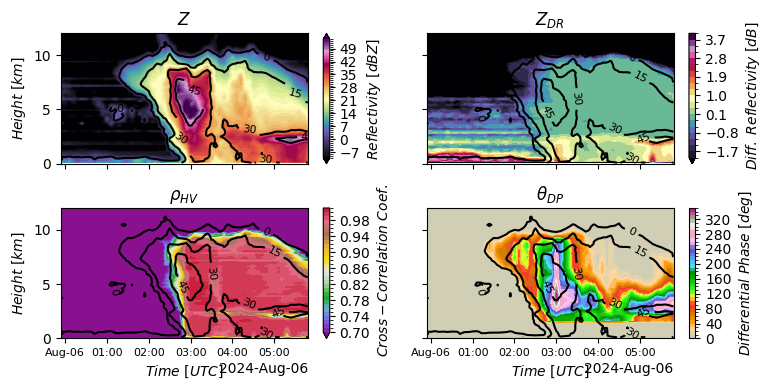

In [8]:
%%time
dmf.ryzhkov_figure(ref_qvp, zdr_qvp, rhohv_qvp, phidp_qvp)